<a href="https://colab.research.google.com/github/nathsteve13/datascience_demo_2025/blob/main/data_science_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INGEST

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [2]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


In [3]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [4]:
df.shape

(61942, 5)

## EDA

In [6]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


<Axes: xlabel='cases', ylabel='deaths'>

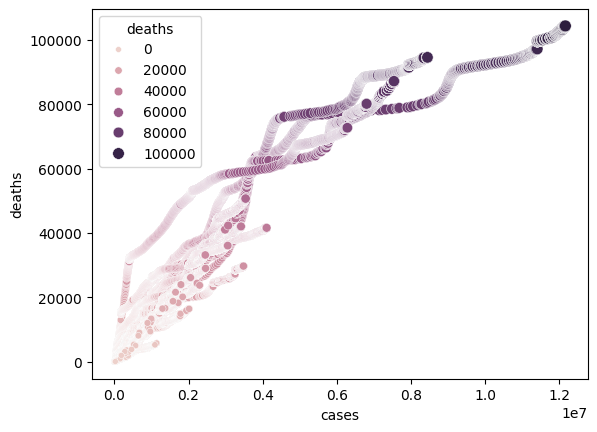

In [7]:
import seaborn as sns

sns.scatterplot(x='cases',y='deaths',
                hue='deaths', size='deaths', data=df)

### DATE-BASED DATA

In [8]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()


,state,fips,cases,deaths
date,,,,
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0


In [12]:
current_df = df.loc[df.index.max()]
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-03-23,Alabama,1,1648385,21631
2023-03-23,Alaska,2,308893,1438
2023-03-23,American Samoa,60,8321,34
2023-03-23,Arizona,4,2451062,33190
2023-03-23,Arkansas,5,1008303,13068
2023-03-23,California,6,12169158,104277
2023-03-23,Colorado,8,1771010,14245
2023-03-23,Connecticut,9,978456,12270
2023-03-23,Delaware,10,332861,3352


### STATE-BASED ANALYSIS

In [13]:
top_ten_states = list(current_df['state'].head(10).values)
top_ten_states

['Alabama',
 'Alaska',
 'American Samoa',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia']

In [15]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns='fips')
top_states_df


,state,cases,deaths
date,,,
2020-01-25,California,1,0
2020-01-26,Arizona,1,0
2020-01-26,California,2,0
2020-01-27,Arizona,1,0
2020-01-27,California,2,0
...,...,...,...
2023-03-23,California,12169158,104277
2023-03-23,Colorado,1771010,14245
2023-03-23,Connecticut,978456,12270


<Figure size 1500x500 with 0 Axes>

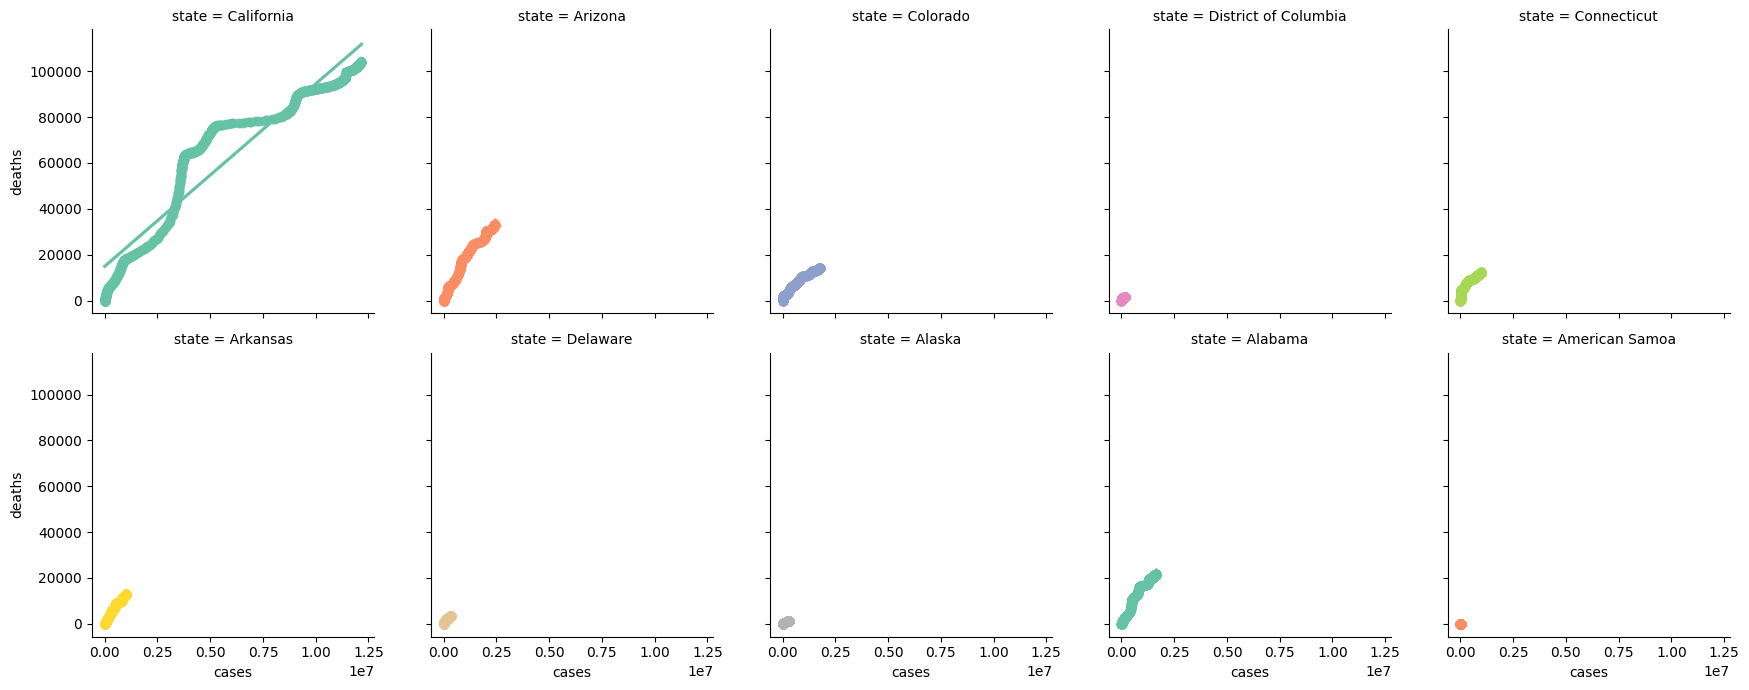

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5))
ax = sns.lmplot(
    x="cases",
    y="deaths",
    height=3.5,
    col="state",
    col_wrap=5,
    hue="state",
    palette="Set2",
    data=top_states_df
)

ax.fig.subplots_adjust(wspace=.2)
plt.show()


In [17]:
top_states_march_current_df = top_states_df.loc["2020-03-08":].sort_values(
    by=["deaths", "cases"], ascending=False
)

top_states_march_current_df.head()


,state,cases,deaths
date,,,
2023-03-23,California,12169158,104277
2023-03-22,California,12155467,104196
2023-03-21,California,12154941,104185
2023-03-20,California,12154293,104165
2023-03-19,California,12153083,104130


In [18]:
import plotly.io as pio
pio.renderers.default = 'colab'

import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths")
fig.show()

### SEARCH FOR FEATURES: POLITICAL, HEALTH, FINANCE

In [20]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column] = cdc_2013[column].str.extract(r"(\d+\.?\d*)").astype(float)


cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"}, inplace=True)
cdc_2013.head()


,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


In [21]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,Arizona,4,1,0,33.0
2,California,6,2,0,22.9
3,Arizona,4,1,0,33.0
4,California,6,2,0,22.9


In [25]:
election_df = pd.read_csv("https://raw.githubusercontent.com/kshaffer/election2016/master/2016ElectionResultsByState.csv")
election_df.rename(columns={"State": "state"}, inplace=True)
election_df.head()

,state,postal,clintonVotes,clintonElectors,trumpVotes,trumpElectors,johnsonVotes,steinVotes,mcmullinVotes,othersVotes,totalVotes
0,Alabama,AL,729547,0,1318255,9,44467,9391,0,21712,2123372
1,Alaska,AK,116454,0,163387,3,18725,5735,0,14307,318608
2,Arizona,AZ,1161167,0,1252401,11,106327,34345,0,0,2554240
3,Arkansas,AR,380494,0,684782,6,29829,9473,13255,12712,1130635
4,California,CA,8696374,55,4452094,0,474615,275823,0,65507,13964413


## MODELING

## CONCLUSION